In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#IDEA:QUIERO AVERIGUAR CUAL FUE EL VIAJE/S MAS LARGO, QUE FECHA SE DIO
#BAJO QUE CONDICIONES CLIMATICAS, Y A QUE ESTACION PERTENECIO
#IDEAS QUE SEAN DE ESTE ESTILO

In [64]:
trip = pd.read_csv('tp_bike/trip.csv')

In [65]:
trip.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214


In [66]:
station = pd.read_csv('tp_bike/station.csv')

In [67]:
#station[18:25]
tripCityZip = pd.read_csv('tp_bike/tripCityZip.csv')

In [68]:
tripCityZip.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,start_zip_code,end_city,end_zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,San Francisco,94107,San Francisco,94107
1,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103,San Francisco,94107,San Francisco,94107
2,5070,168,8/29/2013 21:43,South Van Ness at Market,66,8/29/2013 21:46,South Van Ness at Market,66,598,Subscriber,94115,San Francisco,94107,San Francisco,94107


In [69]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 40.9+ MB


In [70]:
#se perdieron registros, que paso? 20000 menos que en trip
tripCityZip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647025 entries, 0 to 647024
Data columns (total 15 columns):
id                    647025 non-null int64
duration              647025 non-null int64
start_date            647025 non-null object
start_station_name    647025 non-null object
start_station_id      647025 non-null int64
end_date              647025 non-null object
end_station_name      647025 non-null object
end_station_id        647025 non-null int64
bike_id               647025 non-null int64
subscription_type     647025 non-null object
zip_code              640446 non-null object
start_city            647025 non-null object
start_zip_code        647025 non-null int64
end_city              647025 non-null object
end_zip_code          647025 non-null int64
dtypes: int64(7), object(8)
memory usage: 54.3+ MB


In [71]:
#Histograma sobre la variacion de la duracion de los viajes en San Francisco
#
dfSanFransisco = tripCityZip.loc[tripCityZip.start_city.str.contains('San Francisco'),:]\
                            .loc[tripCityZip.end_city.str.contains('San Francisco')]
#               .hist(bins = 2, figsize = (10,6));


In [ ]:
#lo que quiero hacer es mostrar la variacion de la duracion para
#la ciudad de san fransisco, eñ prooblema esta en que sos muchos datos
#muchas duraciones y distintas

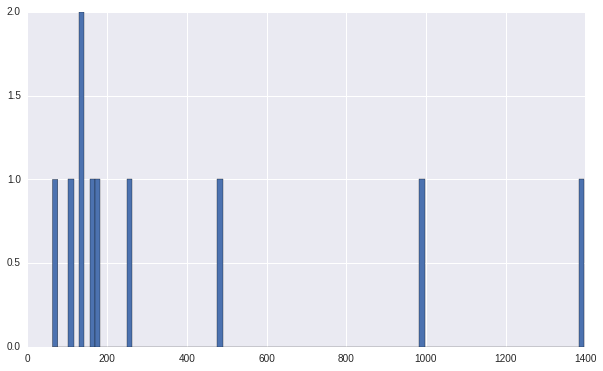

In [91]:
plt.figure()
#dfSanFransisco.loc[dfSanFransisco.duration <= 20,:]\
#              .loc[dfSanFransisco.duration >= 10,:]\
#              ['duration'][0:10].hist(bins = 100, figsize = (10,6));
dfSanFransisco['duration'][0:10].hist(bins = 100, figsize = (10,6));

In [73]:
#viaje mas largo
tripCityZip.sort_values('duration', ascending = False).head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,start_zip_code,end_city,end_zip_code
167668,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531,San Francisco,94107,San Francisco,94107
545216,825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213,San Francisco,94107,San Francisco,94107
639576,750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024,Mountain View,94041,Mountain View,94041


In [74]:
#Cuales fueron los viajes mas largos
trip.sort_values('duration', ascending = False).head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
573566,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
382718,825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
440339,750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024


In [75]:
#donde esta el id_usuario
#la cantidad de id_ usuario debe ser igual a la cantidad de codigos postales

In [76]:
trip['subscription_type'].value_counts()

Subscriber    566746
Customer      103213
Name: subscription_type, dtype: int64

In [77]:
#codigo postal de los clientes
#los customers tiene codigo postal?
trip.groupby('zip_code').count()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type
zip_code,,,,,,,,,,
0,94,94,94,94,94,94,94,94,94,94
1,780,780,780,780,780,780,780,780,780,780
100,17,17,17,17,17,17,17,17,17,17
1000,8,8,8,8,8,8,8,8,8,8
10000,3,3,3,3,3,3,3,3,3,3
100004,4,4,4,4,4,4,4,4,4,4
10001,109,109,109,109,109,109,109,109,109,109
10002,63,63,63,63,63,63,63,63,63,63
10003,124,124,124,124,124,124,124,124,124,124


In [78]:
#los codigos postales son object, hay valores nulos e invalidos, analizar
#las cantidades
trip.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object